In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
adult_df = pd.read_csv('C:/apps/adult/adult2.csv')

print(adult_df['is_more_than_50K'].value_counts())
adult_df.head(10)

0    24720
1     7841
Name: is_more_than_50K, dtype: int64


,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [8]:
print("\n ### adult 데이터 정보 ### \n")
print(adult_df.info())


 ### adult 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   work-class        32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  is_more_than_50K  32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None


In [11]:
print('데이터 세트 Null 값 갯수 \n',adult_df.isnull().sum())

데이터 세트 Null 값 갯수 
 age                 0
work-class          0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
is_more_than_50K    0
dtype: int64


<AxesSubplot:xlabel='age', ylabel='is_more_than_50K'>

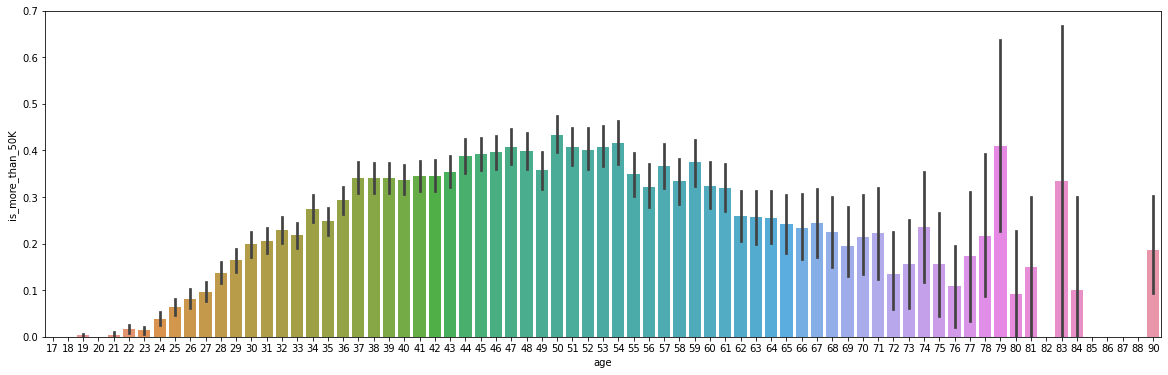

In [17]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'age', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='work-class', ylabel='is_more_than_50K'>

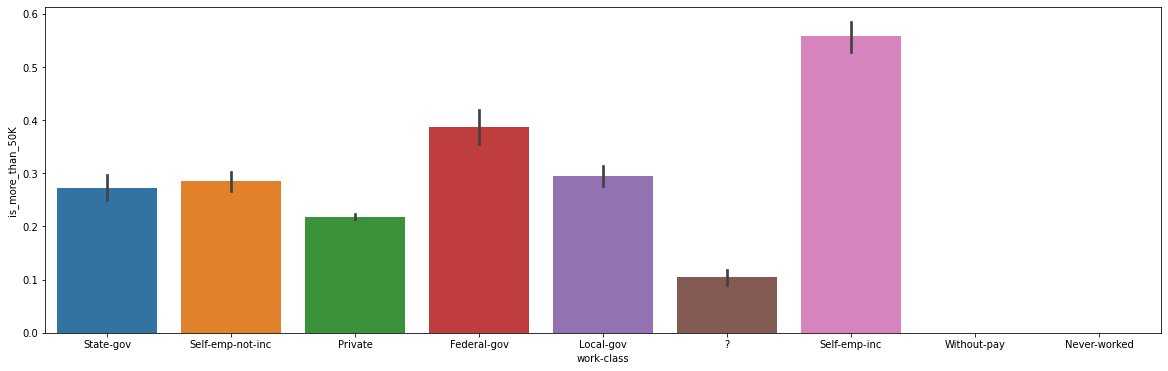

In [14]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'work-class', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='education-num', ylabel='is_more_than_50K'>

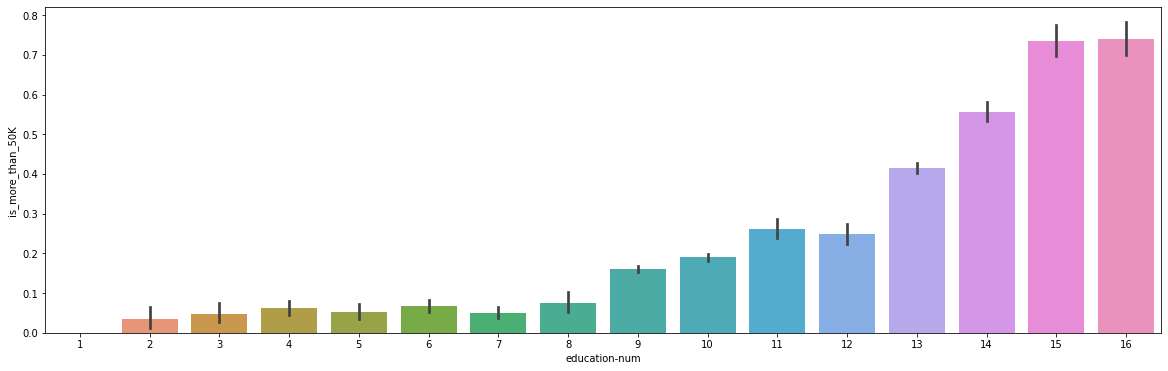

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'education-num', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='occupation', ylabel='is_more_than_50K'>

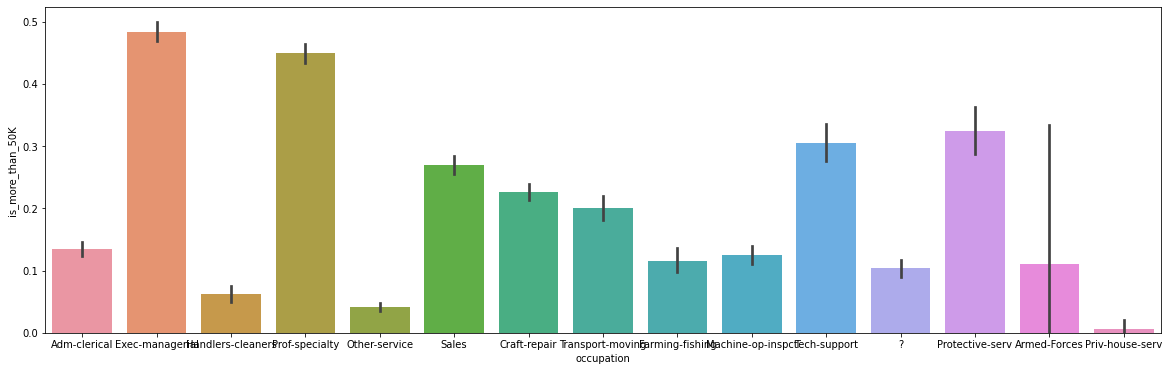

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'occupation', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='race', ylabel='is_more_than_50K'>

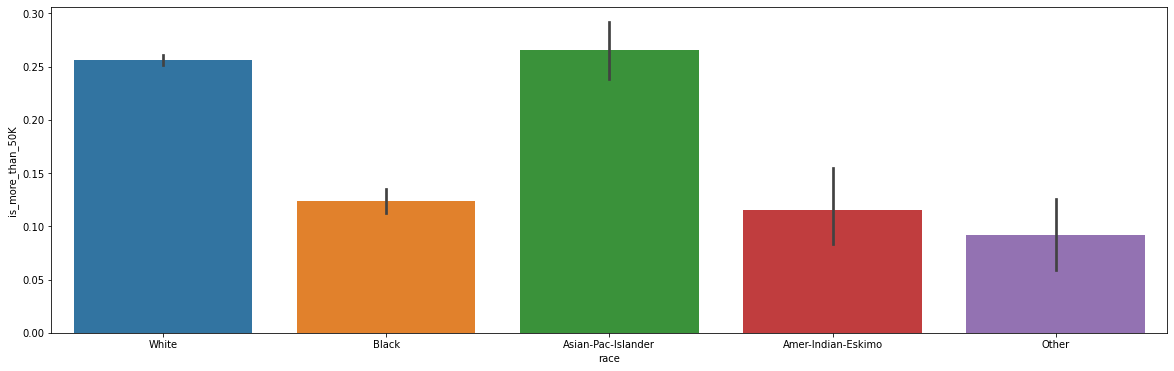

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'race', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='sex', ylabel='is_more_than_50K'>

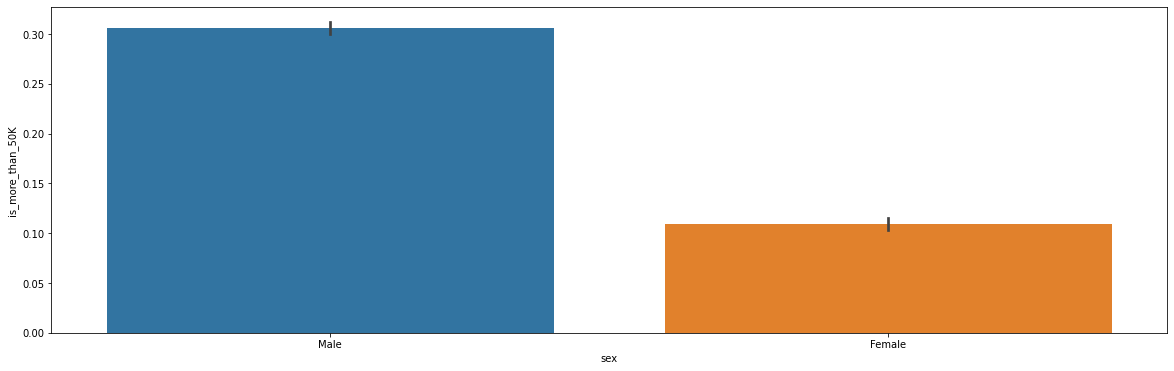

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'sex', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='capital-gain', ylabel='is_more_than_50K'>

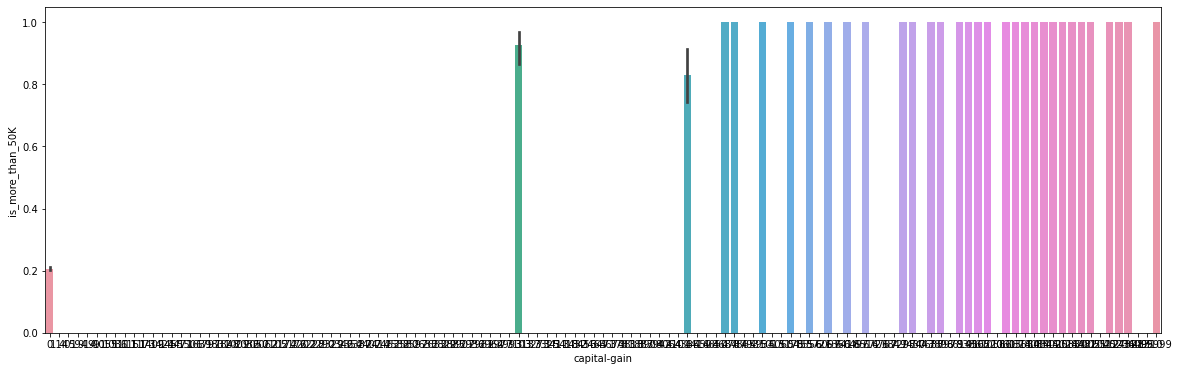

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'capital-gain', y = 'is_more_than_50K', data = adult_df)

<AxesSubplot:xlabel='hours-per-week', ylabel='is_more_than_50K'>

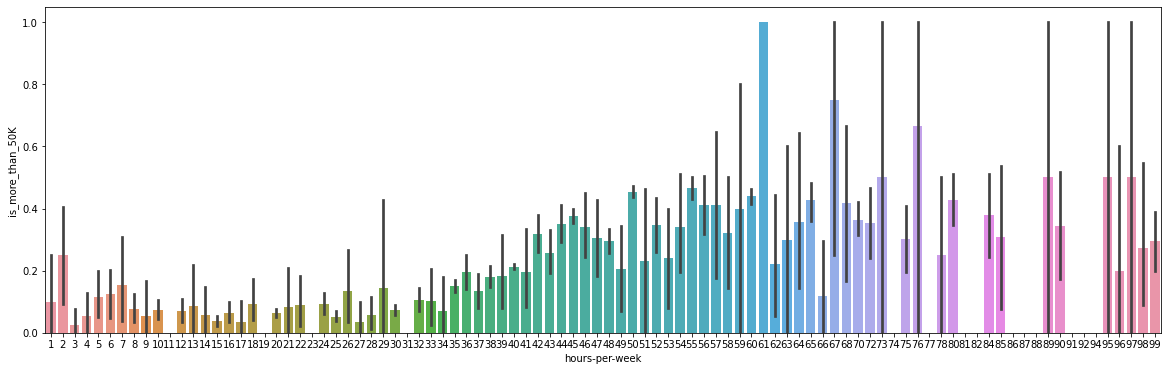

In [23]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'hours-per-week', y = 'is_more_than_50K', data = adult_df)

In [25]:
def encode_features(dataDF):
    features = ['work-class', 'marital-status','occupation','race', 'sex','native-country']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])    
    return dataDF

adult_df = encode_features(adult_df)
adult_df.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39,7,77516,Bachelors,13,4,1,Not-in-family,4,1,2174,0,40,39,0
1,50,6,83311,Bachelors,13,2,4,Husband,4,1,0,0,13,39,0
2,38,4,215646,HS-grad,9,0,6,Not-in-family,4,1,0,0,40,39,0
3,53,4,234721,11th,7,2,6,Husband,2,1,0,0,40,39,0
4,28,4,338409,Bachelors,13,2,10,Wife,2,0,0,0,40,5,0
5,37,4,284582,Masters,14,2,4,Wife,4,0,0,0,40,39,0
6,49,4,160187,9th,5,3,8,Not-in-family,2,0,0,0,16,23,0
7,52,6,209642,HS-grad,9,2,4,Husband,4,1,0,0,45,39,1
8,31,4,45781,Masters,14,4,10,Not-in-family,4,0,14084,0,50,39,1
9,42,4,159449,Bachelors,13,2,4,Husband,4,1,5178,0,40,39,1


In [90]:
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

def drop_features(df):
    df.drop(('fnlwgt', 'education, 'marital-status', 'relationship' , 'native-country'])
    return df

def format_features(df):
    features = ['workclass','race', 'sex','native-country','income']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])    
    return df


def transform_features(df):
    df = encode_features(df)
    df = format_features(df)
    return df

SyntaxError: invalid syntax (<ipython-input-27-45f4185ef93c>, line 4)

In [70]:
adult_df
# y_adult_df = adult_df['income']
# X_adult_df = adult_df.drop('income', axis = 1)

# X_adult_df = transform_features(X_adult_df)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
